<a href="https://colab.research.google.com/github/yazuyuichiro/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow-2nd-Edition/blob/master/15ch/15-15.3.1/step15_15_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 時系列データの予測

#### データ準備

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from keras import losses, models, layers

In [30]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # 波形1
  series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # +波形2
  series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # +ノイズ
  return series[..., np.newaxis].astype(np.float32)

In [31]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [32]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((7000, 50, 1), (7000, 1), (2000, 50, 1), (2000, 1), (1000, 50, 1), (1000, 1))

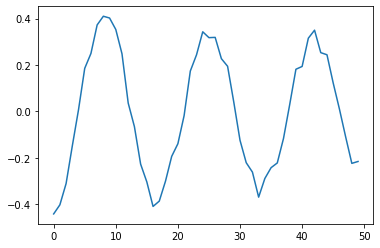

In [33]:
plt.plot(X_train[0])

#### ベースライン指標

In [34]:
# ベースライン1
y_pred = X_valid[:, -1]
np.mean(losses.mean_squared_error(y_valid, y_pred))

0.020405129

In [38]:
# ベースライン2
model = models.Sequential([
    layers.Flatten(input_shape=[50, 1]),
    layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 2s 3ms/step - loss: 0.0919 - val_loss: 0.0409
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0286 - val_loss: 0.0206
Epoch 3/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0162 - val_loss: 0.0132
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0114 - val_loss: 0.0101
Epoch 5/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0093 - val_loss: 0.0088
Epoch 6/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0083 - val_loss: 0.0078
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0073
Epoch 8/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0067
Epoch 9/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 10/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0060

In [39]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 2ms/step - loss: 0.0043


0.004295163322240114